<h3> We use numpy for math operations and matplotlib for plotting our functions/points. </h3>

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

<h3> Euler's method: first order Runge-Kutta method. f is the function, a is the starting point, b is the final point, h is the step size, and y_0 is the initial value. </h3>

In [5]:
def eulerdiff(f,a,b,h,y_0):
    
    x = np.arange(a,b,h)
    y_list = []
    
    for i in x:
        
        y_0 = y_0 + h*f(i,y_0)
        
        y_list.append(y_0)
        
    return x, y_list

<h3> Heun's method (second order Runge-Kutta method): </h3>

In [6]:
def heunsdiff(f,a,b,h,y_0):
    
    x = np.arange(a,b,h)
    y_list = []
    
    for i in x:
        
        k1 = h*f(i,y_0)
        
        k2 = h*f(i+h,y_0+(k1*h))
        
        y_0 = y_0 + (1/2)*(k1 + k2)
        
        y_list.append(y_0)

    return x, y_list

<h3>Fourth order Runge-Kutta: </h3>

In [7]:
def RK4diff(f,a,b,h,y_0):
    
    x = np.arange(a,b,h)
    y_list = []

    for i in x:
        
        k1 = h*f(i,y_0)
        
        k2 = h*f(i+h/2,y_0+(k1*h/2))
        
        k3 = h*f(i+h/2,y_0+(k2*h/2))
    
        k4 = h*f(i+h,y_0+(k3*h))
        
        y_0 = y_0 + (1/6)*(k1 + 2*k2 + 2*k3 +k4)
        
        y_list.append(y_0)
        
    return x, y_list


<h3> Our test function is <br/> <br/>
$ 
\begin{equation}
\frac{dy}{dt} = -y^2\cos(x) 
\end{equation} $
<br/>
</h3>

In [8]:
f = lambda x,y: -(y**2)*np.cos(x)

<h3> (x1,y1), (x2,y2), (x3,y3), (xt,yt) corresponds to the solution via Euler's Method, Heun's Method, Fourth Order Runge-Kutta, and the analytic solution $y = \frac{1}{\sin(x)+1}$, respectively. </h3> 

In [9]:
points1 = eulerdiff(f,0,30,0.001,1)
x1 = points1[0]
y1 = points1[1]

points2 = heunsdiff(f,0,30,0.001,1)
x2 = points2[0]
y2 = points2[1]


points3 = RK4diff(f,0,30,0.001,1)
x3 = points3[0]
y3 = points3[1]

x_t = np.linspace(0,50,num = 1000)
y_t = 1/(np.sin(x_t)+1)

<h3> We compare the 3 methods by plotting the generated numerical solutions. </h3>   

<function matplotlib.pyplot.show(*args, **kw)>

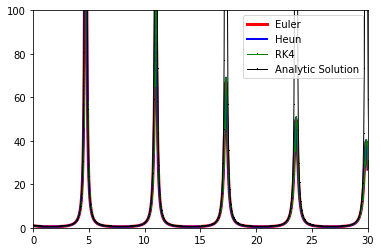

In [10]:
plt.ylim(0,100) 
plt.xlim(0,30)    


plt.plot(x1,y1,
         color = 'red',
         label = 'Euler',
         marker = ',',
         linewidth = 3) 

plt.plot(x2,y2,
         color = 'blue',
         label = 'Heun',
         marker = ',',
         linewidth = 2) 


plt.plot(x3,y3,
         color = 'green',
         label = 'RK4',
         marker = ',',
         linewidth = 1) 


plt.plot(x_t,y_t,
         color = 'black',
         label = 'Analytic Solution',
         marker = ',',
         linewidth = 1) 

plt.legend(loc='upper right')

plt.show